In [1]:
import empyrical as ep
import pandas as pd 
import datetime
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import matplotlib.pylab as pylab
import sys, os
import seaborn as sns
from plotly import graph_objects as go

%matplotlib inline
mpl.rcParams['figure.dpi']= 300
pd.set_option('display.float_format', lambda x: '%.3f' % x)
sns.set_style("whitegrid")
sns.set_palette("Paired")
pylab.rcParams['figure.figsize'] = 16, 6


In [2]:
portfolio = {

    "guenos/SYO.CSV":1, # ruta/ficherodarwin.csv : nivel de apalancamiento del mismo.
    "guenos/THA.csv":1,
    "guenos/ZVQ.csv":1,
    "guenos/LVS.csv":1
}


In [3]:
df_sessionlogs = {}

for informe_path in portfolio:
    multiplicador = portfolio[informe_path]
    df = pd.read_csv(informe_path,parse_dates=True,index_col=['Date'])
    df["Price"] = df["Price"] * multiplicador
    df_sessionlogs[informe_path] = df

In [4]:
df_portfolio = None

for informe_path in df_sessionlogs:
    if df_portfolio is None:
        df_portfolio = df_sessionlogs[informe_path]
        df_portfolio.columns = [informe_path]
    else:
        df_portfolio = df_portfolio.join(df_sessionlogs[informe_path].rename(columns={
            "Price":informe_path
        })).fillna(0)
        
# Creamos la columna total con el PyG del portfolio
df_portfolio["total"] = df_portfolio.sum(axis=1)

In [5]:
# Calculamos la peor sesion
peor_sesion = df_portfolio["total"].min()

# Calculamos el peor DD
cumulative = df_portfolio["total"].cumsum().values
max_return = np.fmax.accumulate(cumulative)
peor_drawdown = np.nanmin(cumulative - max_return)

# Utilizamos una formula "inventada" para llegar a un capital minimo aceptable. 
capital_sugerido = abs(round(min(5*peor_drawdown,15*peor_sesion),0))

# Creamos el DF con la informacion necesaria, y lo mostramos
df_estadisticas = pd.DataFrame.from_dict({
    "Peor Sesion": peor_sesion,
    "Peor Drawdown": peor_drawdown,
    "Capital Necesario": capital_sugerido
},"index")

df_estadisticas.columns = ["Darwins Buenos"]

In [6]:
df_estadisticas

,Darwins Buenos
Peor Sesion,-45.570
Peor Drawdown,-117.900
Capital Necesario,684.000


In [7]:
df_returns = (df_portfolio["total"].cumsum() + capital_sugerido).pct_change().dropna() # retornos en $ + capital sugerido

In [8]:
df_performance = pd.DataFrame.from_dict({
    "PyG": df_portfolio["total"].cumsum().values[-1],
    "Sesiones Analizadas": len(df_portfolio),
    "Sesiones Ganadoras (%)": 100 * len(df_portfolio[df_portfolio["total"]>0]) /  len(df_portfolio[df_portfolio["total"]!=0]),
    "ROI Anualizado": 100 * ep.annual_return(df_returns),
    "CAGR" :  100 * ep.cagr(df_returns),
    "Volatilidad Anualizada": 100 *  ep.annual_volatility(df_returns),
    "Profit Factor":  df_returns[df_returns > 0].sum() / abs(df_returns[df_returns < 0].sum()),
    "Promedio Sesion Ganadora":  df_portfolio[df_portfolio["total"] > 0]["total"].mean(),
    "Promedio Sesion Perdedora":  df_portfolio[df_portfolio["total"] < 0]["total"].mean(),
    "Ratio Sharpe": ep.sharpe_ratio(df_returns),
    "Ratio Sortino": ep.sortino_ratio(df_returns),
    "Ratio Calmar" :  ep.calmar_ratio(df_returns),
    "Tail Ratio" : ep.tail_ratio(df_returns),
    "Omega Ratio" : ep.omega_ratio(df_returns),
    "Peor Sesion": peor_sesion,
    "Peor Drawdown": peor_drawdown,
    "Min Bankroll NoBust": capital_sugerido,
    "VAR95%" : ep.value_at_risk(df_returns,0.95),
},"index")

df_performance.columns = ["Portfolio Bueno"]

In [9]:
df_performance

,Portfolio Bueno
PyG,1335.560
Sesiones Analizadas,685.000
Sesiones Ganadoras (%),57.810
ROI Anualizado,49.201
CAGR,49.201
Volatilidad Anualizada,14.493
Profit Factor,1.695
Promedio Sesion Ganadora,9.071
Promedio Sesion Perdedora,-7.809
Ratio Sharpe,2.835


c:\programdata\miniconda3\envs\quantarmy\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



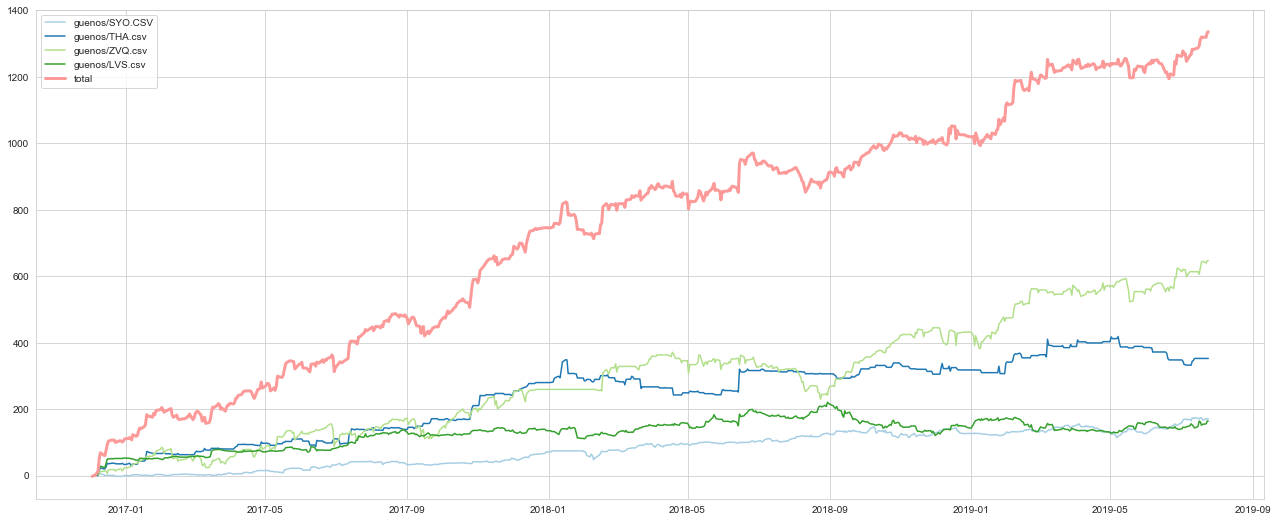

In [10]:
fig = plt.figure(figsize=(22,9))

plt.plot(df_portfolio.drop("total", axis=1).cumsum())
plt.plot(df_portfolio["total"].cumsum(), linewidth=3);

leg = plt.legend(df_portfolio.columns.values)
plt.show()

In [11]:
vertedero = {

    "malos/BAS.CSV":1,
    "malos/CQY.csv":1,
    "malos/EZN.csv":1,
    "malos/HSM.csv":1
}


In [12]:
df_sessionlogs_vertedero = {}

for informe_path in vertedero:
    multiplicador = vertedero[informe_path]
    df = pd.read_csv(informe_path,parse_dates=True,index_col=['Date'])
    df["Price"] = df["Price"] * multiplicador
    df_sessionlogs_vertedero[informe_path] = df

In [13]:
df_portfolio_basurero = None

for informe_path in df_sessionlogs_vertedero:
    if df_portfolio_basurero is None:
        df_portfolio_basurero = df_sessionlogs_vertedero[informe_path]
        df_portfolio_basurero.columns = [informe_path]
    else:
        df_portfolio_basurero = df_portfolio_basurero.join(df_sessionlogs_vertedero[informe_path].rename(columns={
            "Price":informe_path
        })).fillna(0)

df_portfolio_basurero["total"] = df_portfolio_basurero.sum(axis=1)

In [14]:

peor_sesion_malo = df_portfolio_basurero["total"].min()


cumulative_malo = df_portfolio_basurero["total"].cumsum().values
max_return_malo = np.fmax.accumulate(cumulative_malo)
peor_drawdown_malo = np.nanmin(cumulative_malo - max_return_malo)


capital_sugerido_malo = abs(round(min(5*peor_drawdown_malo,15*peor_sesion_malo),0))


df_estadisticas_malas = pd.DataFrame.from_dict({
    "Peor Sesion": peor_sesion_malo,
    "Peor Drawdown": peor_drawdown_malo,
    "Capital Necesario": capital_sugerido_malo
},"index")

df_estadisticas_malas.columns = ["Darwins BASURA"]

df_estadisticas_malas

,Darwins BASURA
Peor Sesion,-29.160
Peor Drawdown,-79.550
Capital Necesario,437.000


In [15]:
df_returns_malo = (df_portfolio_basurero["total"].cumsum() + capital_sugerido_malo).pct_change().dropna()

df_performance_malo = pd.DataFrame.from_dict({
    "PyG": df_portfolio_basurero["total"].cumsum().values[-1],
    "Sesiones Analizadas": len(df_portfolio_basurero),
    "Sesiones Ganadoras (%)": 100 * len(df_portfolio_basurero[df_portfolio_basurero["total"]>0]) /  len(df_portfolio_basurero[df_portfolio_basurero["total"]!=0]),
    "ROI Anualizado": 100 * ep.annual_return(df_returns_malo),
    "CAGR" :  100 * ep.cagr(df_returns_malo),
    "Volatilidad Anualizada": 100 *  ep.annual_volatility(df_returns_malo),
    "Profit Factor":  df_returns_malo[df_returns_malo > 0].sum() / abs(df_returns_malo[df_returns_malo < 0].sum()),
    "Promedio Sesion Ganadora":  df_portfolio_basurero[df_portfolio_basurero["total"] > 0]["total"].mean(),
    "Promedio Sesion Perdedora":  df_portfolio_basurero[df_portfolio_basurero["total"] < 0]["total"].mean(),
    "Ratio Sharpe": ep.sharpe_ratio(df_returns_malo),
    "Ratio Sortino": ep.sortino_ratio(df_returns_malo),
    "Ratio Calmar" :  ep.calmar_ratio(df_returns_malo),
    "Tail Ratio" : ep.tail_ratio(df_returns_malo),
    "Omega Ratio" : ep.omega_ratio(df_returns_malo),
    "Peor Sesion": peor_sesion_malo,
    "Peor Drawdown": peor_drawdown_malo,
    "Min Bankroll NoBust": capital_sugerido_malo,
    "VAR95%" : ep.value_at_risk(df_returns_malo,0.95),
},"index")

df_performance_malo.columns = ["El Basurero"]

In [16]:
df_performance_malo

,El Basurero
PyG,-7.340
Sesiones Analizadas,595.000
Sesiones Ganadoras (%),50.673
ROI Anualizado,-0.678
CAGR,-0.678
Volatilidad Anualizada,14.062
Profit Factor,1.004
Promedio Sesion Ganadora,2.816
Promedio Sesion Perdedora,-2.918
Ratio Sharpe,0.022


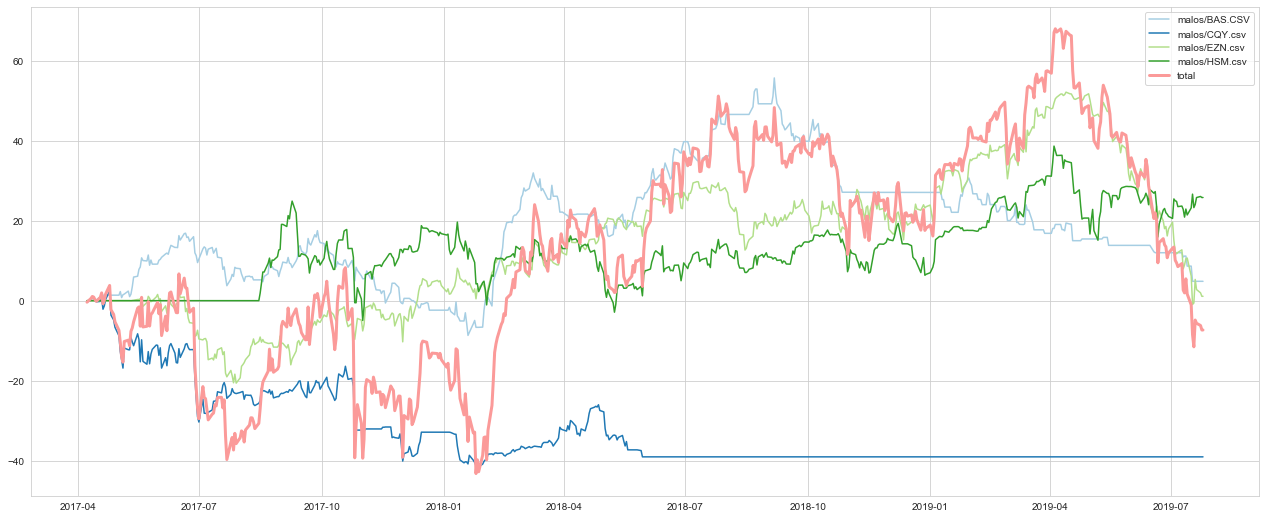

In [17]:
# Graficamos el portfolio
fig = plt.figure(figsize=(22,9))

plt.plot(df_portfolio_basurero.drop("total", axis=1).cumsum())
plt.plot(df_portfolio_basurero["total"].cumsum(), linewidth=3);

leg = plt.legend(df_portfolio_basurero.columns.values)
plt.show()